In [29]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
import pickle

caltech_dir = "food/images"
categories = ["apple_pie", "bibimbap", "burrito", "cheesecake", "chicken", "chocolate_cake",
             "churros", "cup_cakes", "curry", "dimsum", "donuts", "french_fries", "fried_rice", "garlic_bread",
              "gyoza", "hamburger", "honey_bread", "hot_dog", "ice_cream", "macarons", "miso_soup", "nachos",
              "omelette", "onion_rings", "pancakes", "pho", "pizza", "prime_rib", "quesadilla", "ramen", "salad", "sandwich",
              "sashimi", "soup", "spaghetti_bolognese", "spaghetti_carbonara", "steak", "strawberry_shortcake", "sushi", "tacos",
              "takoyaki", "tiramisu", "toast", "waffles", "yogurt"]
nb_classes = len(categories)

image_w, image_h = 64, 64
pixels = image_w * image_h * 3 

X, y = [], []

for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, "파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        X.append(data)
        y.append(label)
            
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
xy = (X_train, X_test, y_train, y_test)

print("xy ready")

apple_pie 파일 길이 :  1000
bibimbap 파일 길이 :  1000
burrito 파일 길이 :  1000
cheesecake 파일 길이 :  1000
chicken 파일 길이 :  1000
chocolate_cake 파일 길이 :  1000
churros 파일 길이 :  1000
cup_cakes 파일 길이 :  1000
curry 파일 길이 :  1000
dimsum 파일 길이 :  1000
donuts 파일 길이 :  1000
french_fries 파일 길이 :  1000
fried_rice 파일 길이 :  1000
garlic_bread 파일 길이 :  1000
gyoza 파일 길이 :  1000
hamburger 파일 길이 :  1000
honey_bread 파일 길이 :  1000
hot_dog 파일 길이 :  1000
ice_cream 파일 길이 :  1000
macarons 파일 길이 :  1000
miso_soup 파일 길이 :  1000
nachos 파일 길이 :  1000
omelette 파일 길이 :  1000
onion_rings 파일 길이 :  1000
pancakes 파일 길이 :  1000
pho 파일 길이 :  1000
pizza 파일 길이 :  1000
prime_rib 파일 길이 :  1000
quesadilla 파일 길이 :  1000
ramen 파일 길이 :  1000
salad 파일 길이 :  1000
sandwich 파일 길이 :  1000
sashimi 파일 길이 :  1000
soup 파일 길이 :  1000
spaghetti_bolognese 파일 길이 :  1000
spaghetti_carbonara 파일 길이 :  1000
steak 파일 길이 :  1000
strawberry_shortcake 파일 길이 :  1000
sushi 파일 길이 :  1000
tacos 파일 길이 :  1000
takoyaki 파일 길이 :  1000
tiramisu 파일 길이 :  1000
toast 파일 길이 

In [30]:
pickle.dump(xy, open("multi_image_data_64.npy", 'wb'), protocol=4)

print("ok", len(y))

ok 45000


In [31]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('multi_image_data_64.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(36000, 64, 64, 3)
36000


In [32]:
categories = ["apple_pie", "bibimbap", "burrito", "cheesecake", "chicken", "chocolate_cake",
             "churros", "cup_cakes", "curry", "dimsum", "donuts", "french_fries", "fried_rice", "garlic_bread",
              "gyoza", "hamburger", "honey_bread", "hot_dog", "ice_cream", "macarons", "miso_soup", "nachos",
              "omelette", "onion_rings", "pancakes", "pho", "pizza", "prime_rib", "quesadilla", "ramen", "salad", "sandwich",
              "sashimi", "soup", "spaghetti_bolognese", "spaghetti_carbonara", "steak", "strawberry_shortcake", "sushi", "tacos",
              "takoyaki", "tiramisu", "toast", "waffles", "yogurt"]
nb_classes = len(categories)

# 정규화
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

print("OK")

OK


In [33]:
with tf.device("/gpu:0"):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)            

In [34]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
563/563 [==============================] - 71s 123ms/step - loss: 3.7952 - accuracy: 0.0441 - val_loss: 3.4410 - val_accuracy: 0.1358

Epoch 00001: val_loss improved from inf to 3.44097, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
Epoch 2/50
563/563 [==============================] - 69s 123ms/step - loss: 3.3845 - accuracy: 0.1269 - val_loss: 3.1724 - val_accuracy: 0.1787

Epoch 00002: val_loss improved from 3.44097 to 3.17239, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
Epoch 3/50
563/563 [==============================] - 71s 126ms/step - loss: 3.1591 - accuracy: 0.1785 - val_loss: 3.0791 - val_accuracy: 0.2042

Epoch 00003: val_loss improved from 3.17239 to 3.07913, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.mod

In [35]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

282/282 [==============================] - 3s 12ms/step - loss: 2.9359 - accuracy: 0.2350
정확도 : 0.2350


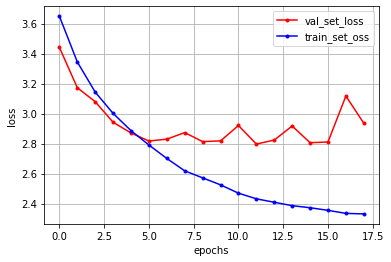

In [36]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()
